In [1]:
import matplotlib.pyplot as plt
import pickle
from WeightsModification import *
import os
import numpy as np
from matplotlib.ticker import MultipleLocator



In [2]:
def plot_all_summarised(dataset, is_niid_1, is_beta):
     baseline_one = f"baseline_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     alpha_pointone = f"alpha_0.1_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     alpha_pointfive = f"alpha_0.5_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     alpha_pointnine = f"alpha_0.9_{dataset}_{"10.0" if is_beta else "1.0"}_COMMS25_LOCAL10_BS64_USERS{"10" if is_niid_1 else "6"}_IID{"2" if is_niid_1 else "4"}.pkl"
     
     uri = "../save/objects"
     trials = ["trial_1","trial_2","trial_3","trial_4","trial_5"]
     individual_files = [baseline_one, alpha_pointone, alpha_pointfive, alpha_pointnine]
     x_vals = list(range(1, 26))
     means_and_stdevs = []
     labels = []
     for setting in individual_files:
        all_data = []
        for trial in trials:
            whole_file_name = f"{uri}/{trial}/{setting}"
            if os.path.exists(whole_file_name):
                with open(whole_file_name, "rb") as f:
                    res = pickle.load(f)
                all_data.append(res.global_loss_manager.validation_total_across_communication)
        if len(all_data) != 0:
            
            all_data = np.array(all_data)
            means = np.mean(all_data, axis=0)
            stdevs = np.std(all_data, axis=0)
            means_and_stdevs.append((means, stdevs))
            relevant_label = ""
            if setting.split("_")[0] == "baseline":
                relevant_label = "baseline"
            else:  
                relevant_label = setting.split("_")[1]
            labels.append(relevant_label)
     
     
     fig, ax = plt.subplots()
     plt.xlabel("Communication Rounds")
     plt.ylabel("VAE Average Test Loss")
     # plt.title(f"Average test loss difference over 25 communication rounds between a β-VAE with β={"10.0" if is_beta else "1.0"} \n and modified weights over different values of α under a {"NIID-1" if is_niid_1 else "NIID_2"} setting")
     for idx, label in enumerate(labels):
         print(means_and_stdevs[idx][0])
         graph_label = "α = " + label if label != "baseline" else "Baseline"
         markers, caps, bars = plt.errorbar(x_vals, means_and_stdevs[idx][0],yerr=means_and_stdevs[idx][1],label=graph_label,capsize=2)
         [bar.set_alpha(0.45) for bar in bars]
         [cap.set_markeredgewidth(1) for cap in caps]
     plt.grid()
     plt.legend()
     ax.yaxis.get_ticklocs(minor=True)
     ax.minorticks_on()
     ax.xaxis.set_tick_params(which='minor',bottom=False)
     ax.set_xlim(xmin=1)
     ax.set_xlim(xmax=25)



     fig.tight_layout()
     plt.show()
        

[691.02633976 603.98478314 520.48771678 498.24326382 491.93694814
 488.47620254 486.055518   483.9928933  483.20795999 482.42417864
 481.78062023 481.1948467  480.64276637 480.98681525 480.57600164
 479.56381586 480.18189383 479.86306521 478.93283533 479.52971838
 480.06731008 479.39287019 478.79760105 478.1185653  478.2451862 ]
[689.28584853 592.25561875 505.16801285 494.12153691 487.32173828
 483.90551557 480.96002309 479.85665313 479.59252361 477.65617618
 477.00599757 478.35524036 476.74231654 475.99396388 475.61751177
 474.70876472 474.40850184 474.67796539 474.3608605  474.2152548
 474.21396729 473.41709719 473.36787756 474.27132325 474.43208405]
[531.9456761  467.83549651 464.39810126 461.10697055 460.35165715
 456.95249355 456.41417949 454.73247033 454.97177492 452.74523045
 452.57075544 452.61235802 452.09011424 451.34575012 451.76987467
 450.9467059  450.50453716 451.64285119 450.69822285 450.04278179
 450.37811166 450.52224153 450.35598041 449.94238427 449.51564007]
[473.067

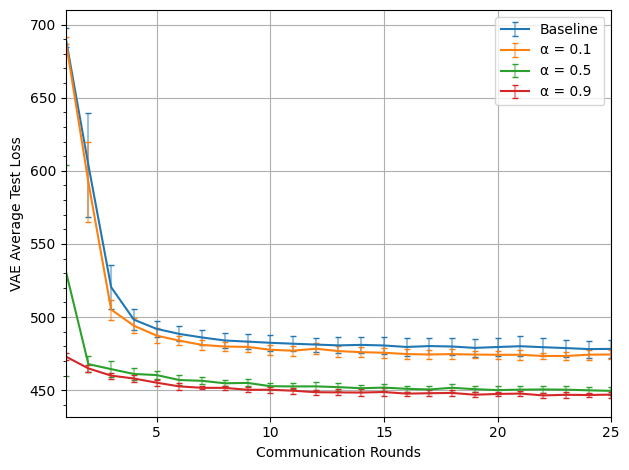

In [4]:
plot_all_summarised("fmnist",is_niid_1=False,is_beta=True)
